# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Tyler Stanton

### GitHub: https://github.com/S566248/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Adds imports after packages are installs

In [4]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
numpy              1.26.4
packaging          24.0
parso              0.8.4
pillow  

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

Fetches HTML content from website and dump into .pkl file

In [5]:
# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)
html_content = response.text

# Dump the HTML content into a .pkl file
with open("article_html.pkl", "wb") as f:
    pickle.dump(html_content, f)

print("Article HTML dumped to article_html.pkl")

Article HTML dumped to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

Opens, reads, and prints .pkl file text

In [6]:
# Read the HTML content from the .pkl file
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Get the text from the HTML content
article_text = soup.get_text()

# Print the article text
print(article_text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

Finds and prints 5 most frequest tokens with frequencies

In [9]:
import string

# Load the English spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Remove punctuation and stopwords
filtered_tokens = [token.text.lower() for token in nlp(article_text) if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequencies of tokens
token_frequencies = Counter(filtered_tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_frequencies.most_common(5)

# Print the common tokens
print("Most common tokens:")
for token, frequency in most_common_tokens:
    print(token)

# Print the tokens and their frequencies
print("\nTokens and their frequencies:")
for token, frequency in token_frequencies.items():
    print(f"{token}: {frequency}")

Most common tokens:
comment
march
2021
says
report

Tokens and their frequencies:
laser: 63
headlights: 56
work: 8
|: 4
hackaday: 15
skip: 1
content: 1
primary: 1
menu: 1
home: 6
blog: 2
hackaday.io: 3
tindie: 2
prize: 3
submit: 2
search: 5
march: 133
27: 5
2021: 133
130: 4
comments: 21
lewin: 2
day: 9
22: 79
think: 14
onward: 1
automotive: 10
technology: 15
usually: 1
thing: 4
come: 8
mind: 6
engines: 1
fuel: 3
efficiency: 18
switch: 5
electric: 2
power: 12
mean: 4
thousands: 1
engineers: 3
world: 6
working: 5
improve: 1
state: 3
art: 3
lighting: 18
sealed: 5
beam: 26
gave: 1
way: 17
modern: 3
designs: 3
regulations: 4
loosened: 1
bulbs: 9
moved: 3
simple: 5
halogens: 3
xenon: 6
hids: 1
recently: 1
leds: 15
new: 16
scene: 1
lasers: 9
bwm: 2
prototype: 2
headlight: 24
assemblies: 1
undergoing: 1
testing: 2
image: 3
brought: 1
phrase: 1
beams: 27
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 68
poor: 4
illumination: 7
outside: 3
specific: 1
spot: 5
distance: 6

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

Finds and prints 5 most frequest lemmas with frequencies 

In [10]:
# Remove punctuation and stopwords, and get lemmas
filtered_lemmas = [token.lemma_.lower() for token in nlp(article_text) if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequencies of lemmas
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the common lemmas
print("Most common lemmas:")
for lemma, frequency in most_common_lemmas:
    print(lemma)

# Print the lemmas and their frequencies
print("\nLemmas and their frequencies:")
for lemma, frequency in lemma_frequencies.items():
    print(f"{lemma}: {frequency}")

Most common lemmas:
comment
say
march
2021
report

Lemmas and their frequencies:
laser: 72
headlights: 7
work: 19
|: 4
hackaday: 15
skip: 1
content: 1
primary: 1
menu: 1
home: 6
blog: 2
hackaday.io: 3
tindie: 2
prize: 3
submit: 2
search: 5
march: 133
27: 5
2021: 133
130: 4
comments: 1
lewin: 2
day: 11
22: 79
think: 17
onward: 1
automotive: 10
technology: 17
headlight: 73
usually: 1
thing: 12
come: 17
mind: 6
engine: 3
fuel: 3
efficiency: 19
switch: 8
electric: 2
power: 13
mean: 9
thousand: 2
engineer: 4
world: 6
improve: 3
state: 4
art: 3
lighting: 16
seal: 4
beam: 53
give: 3
way: 19
modern: 3
design: 14
regulation: 4
loosen: 1
bulb: 9
move: 4
simple: 5
halogen: 7
xenon: 6
hids: 1
recently: 1
led: 30
new: 16
scene: 1
bwm: 2
prototype: 2
assembly: 2
undergo: 1
testing: 1
image: 3
bring: 3
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 99
poor: 4
illumination: 7
outside: 3
specific: 1
spot: 5
distance: 7
away: 9
thankfully: 2
eye: 16
instead: 4
consist: 

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

Creates 2 definitions that find the average amount of interests tokens and lemmas appear in a sentence 

In [14]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    doc = nlp(sentence)
    
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    
    # Return the score
    return interesting_count / len(doc)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence and extract lemmas
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc]
    
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    
    # Return the score
    return interesting_count / len(doc)

# Example usage
sentence = "This is an example sentence with some interesting words."
interesting_tokens = ["example", "interesting"]
interesting_lemmas = ["example", "interesting"]

token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

print("Token score:", token_score)
print("Lemma score:", lemma_score)

Token score: 0.2
Lemma score: 0.2


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Creates a list of the token scores and plots them on a histogram

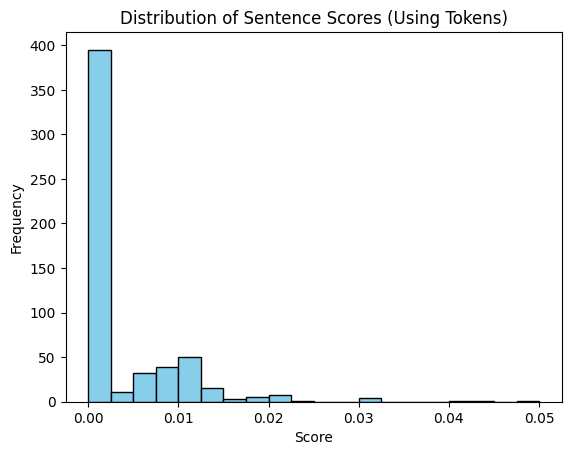

In [19]:
# Load the article text from the .pkl file
with open("article_html.pkl", "rb") as f:
    article_text = pickle.load(f)

# Tokenize the article text into sentences
sentences = [sent.text for sent in nlp(article_text).sents]

# Calculate scores for each sentence using tokens
scores = [score_sentence_by_token(sentence, [token for token, _ in most_common_tokens]) for sentence in sentences]

# Plot a histogram of scores
plt.hist(scores, bins=20, range=(0, 0.05), color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Using Tokens)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores seems to be between 0.00 to 0.01

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Creates a list of the lemma scores and plots them on a histogram

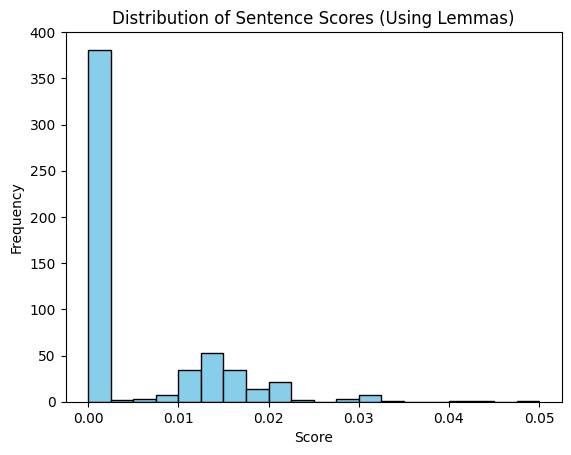

In [20]:
# Load the article text from the .pkl file
with open("article_html.pkl", "rb") as f:
    article_text = pickle.load(f)

# Tokenize the article text into sentences
sentences = [sent.text for sent in nlp(article_text).sents]

# Calculate scores for each sentence using lemmas
scores = [score_sentence_by_lemma(sentence, [lemma for lemma, _ in most_common_lemmas]) for sentence in sentences]

# Plot a histogram of scores
plt.hist(scores, bins=20, range=(0, 0.05), color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Using Lemmas)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores seems to be between 0.00 to 0.01 as well

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To only consider nouns as interesting words, we can identify which words are nouns using the pos_ attribute in spaCy. Nouns have the part-of-speech tag 'NOUN'.

To change the code to only consider nouns, we would modify the score_sentence_by_token and score_sentence_by_lemma functions to filter out tokens and lemmas that are not nouns by adding the following code to each definition:

    t_nouns = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
    interesting_count = sum(1 for token in t_nouns if token in interesting_tokens)

    l_nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
    interesting_count = sum(1 for lemma in l_nouns if lemma in interesting_lemmas)